In [13]:
import queue
import numpy as np
from typing import List, Tuple
import heapq
import math
import datetime
import matplotlib
from matplotlib import pyplot as plt
from tabulate import tabulate
import pandas as pd

In [14]:
df_bb = pd.read_csv('res/b_and_b.csv')
df_bbbeam = pd.read_csv('res/b_and_b_beam.csv')


df_bb_grouped = df_bb.groupby(["Size"]).agg(
    Size =("Size", "first"),
    Time = ("TimeSeconds", "mean"),
    Time_std=("TimeSeconds", "std"),
    Cost = ("Cost", "mean"),
    Cost_std=("Cost", "std"),
    ).reset_index(drop=True)

df_bbbeam_grouped = df_bbbeam.groupby(["Size"]).agg(
    Size =("Size", "first"),
    Time = ("TimeSeconds", "mean"),
    Time_std=("TimeSeconds", "std"),
    Cost = ("Cost", "mean"),
    Cost_std=("Cost", "std"),
    ).reset_index(drop=True)


tmp = df_bb_grouped.copy().round(3)
print("Branch and Bound")
print(tabulate(tmp, headers='keys', tablefmt='pretty', showindex=False))

print()

print("Branch and Bound Beam")
tmp2 = df_bbbeam_grouped.copy().round(3)
print(tabulate(tmp2, headers='keys', tablefmt='pretty', showindex=False))

Branch and Bound
+------+---------+----------+------+----------+
| Size |  Time   | Time_std | Cost | Cost_std |
+------+---------+----------+------+----------+
| 2.0  |   0.0   |   0.0    | 29.4 |  19.895  |
| 3.0  |   0.0   |  0.001   | 36.4 |  15.758  |
| 4.0  |  0.001  |  0.002   | 41.0 |  19.925  |
| 5.0  |  0.001  |  0.001   | 47.6 |  24.684  |
| 6.0  |  0.003  |  0.006   | 62.4 |  14.536  |
| 7.0  |  0.008  |  0.006   | 62.6 |  9.127   |
| 8.0  |  0.063  |  0.069   | 75.0 |  29.741  |
| 9.0  |  0.178  |  0.214   | 66.6 |  14.328  |
| 10.0 |  1.034  |  0.969   | 74.2 |  7.294   |
| 11.0 |  5.57   |  6.543   | 79.4 |   12.7   |
| 12.0 | 51.174  |  99.278  | 86.2 |  24.591  |
| 13.0 | 118.699 | 151.531  | 85.8 |  20.438  |
+------+---------+----------+------+----------+

Branch and Bound Beam
+------+-------+----------+------+----------+
| Size | Time  | Time_std | Cost | Cost_std |
+------+-------+----------+------+----------+
| 2.0  |  0.0  |   0.0    | 29.4 |  19.895  |
| 3.0  |

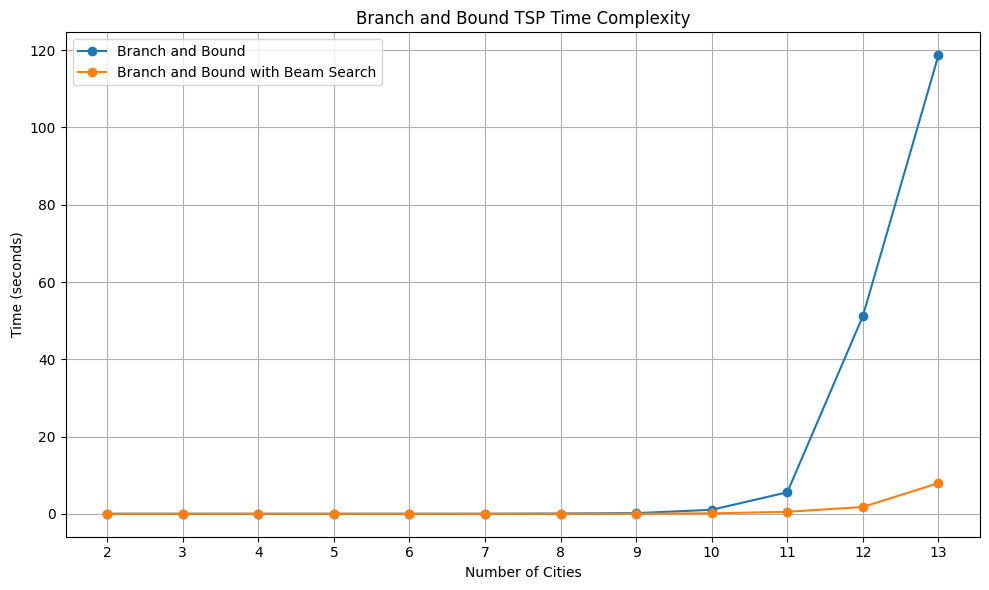

In [15]:
plt.figure(figsize=(10, 6))

plt.plot(df_bb_grouped["Size"], df_bb_grouped["Time"], label="Branch and Bound", marker='o')

plt.plot(df_bbbeam_grouped["Size"], df_bbbeam_grouped["Time"], label="Branch and Bound with Beam Search", marker='o')

plt.title("Branch and Bound TSP Time Complexity")
plt.xlabel("Number of Cities")
plt.ylabel("Time (seconds)")
plt.legend()
plt.xticks(df_bb_grouped["Size"])
plt.grid(True)
plt.tight_layout()
# plt.savefig('res/b_and_b.png')
plt.show()

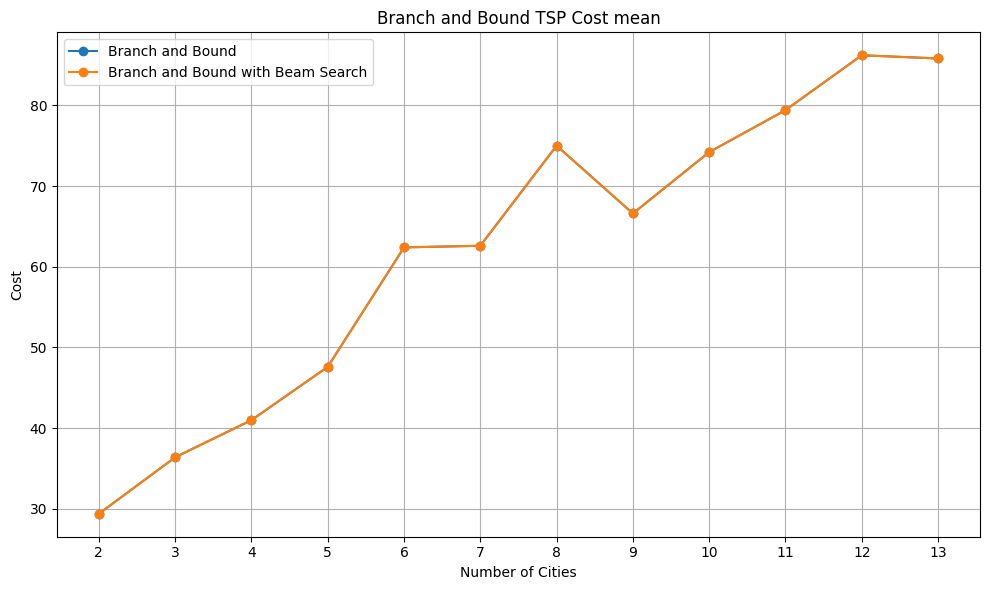

In [16]:
plt.figure(figsize=(10, 6))

plt.plot(df_bb_grouped["Size"], df_bb_grouped["Cost"], label="Branch and Bound", marker='o')

plt.plot(df_bbbeam_grouped["Size"], df_bbbeam_grouped["Cost"], label="Branch and Bound with Beam Search", marker='o')

plt.title("Branch and Bound TSP Cost mean")
plt.xlabel("Number of Cities")
plt.ylabel("Cost")
plt.legend()
plt.xticks(df_bb_grouped["Size"])
plt.grid(True)
plt.tight_layout()
plt.show()